# importing libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# reading the data

In [115]:
# Creating a list of attributes
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

# Adding the attributes as an argument for pandas to export into the data frame
df = pd.read_csv("magic04.data", names = cols)
df.head(10) # Displays the first five rows of data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [116]:
print(len(df))

19020


In [117]:
df["class"].unique() # g stands for gamma and h stands for hadrons

array(['g', 'h'], dtype=object)

In [118]:
print(len(df[df["class"] == "g"]))

12332


In [119]:
print(len(df[df["class"] == "h"]))

6688


In [120]:
df["class"] = (df["class"] == "g").astype(int)

In [121]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


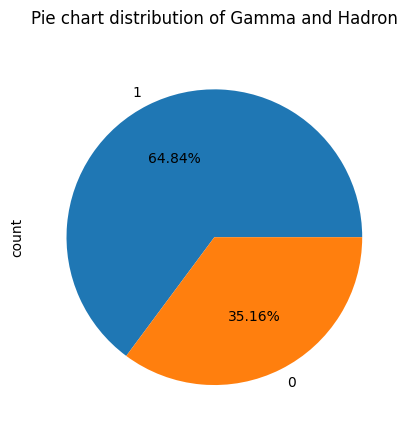

In [122]:
labels = ["Gamma", "Hedron"]
df["class"].value_counts().plot(kind = "pie", autopct = "%1.2f%%")
plt.title("Pie chart distribution of Gamma and Hadron\n")
plt.show()

In [123]:
df.columns 

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [124]:
# checking for duplicates
df_duplicates = df.duplicated()

In [125]:
# length of the dataset before duplicates were removed
len(df)

19020

In [126]:
# print the duplicated rows
df_duplicated = df[df_duplicates]
print(df_duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
19015    False
19016    False
19017    False
19018    False
19019    False
Length: 19020, dtype: bool


In [127]:
# remove duplicates and keep only the first occurence
df_no_duplicates = df.drop_duplicates()
df = df_no_duplicates

In [128]:
# length of the dataset after duplicates were removed
len(df)

18905

In [129]:
df.shape

(18905, 11)

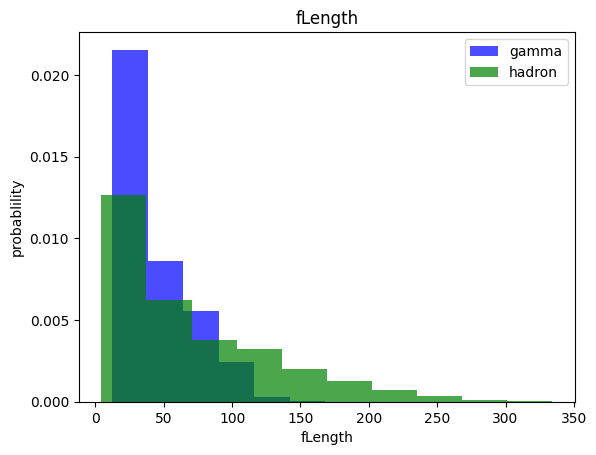

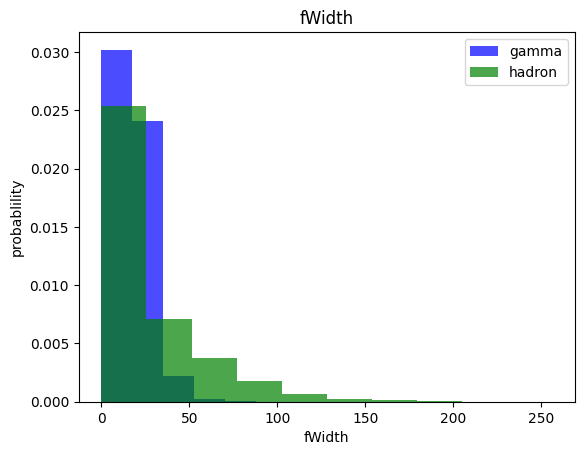

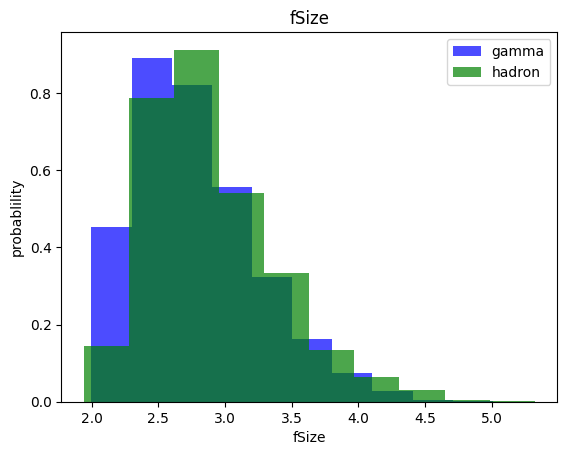

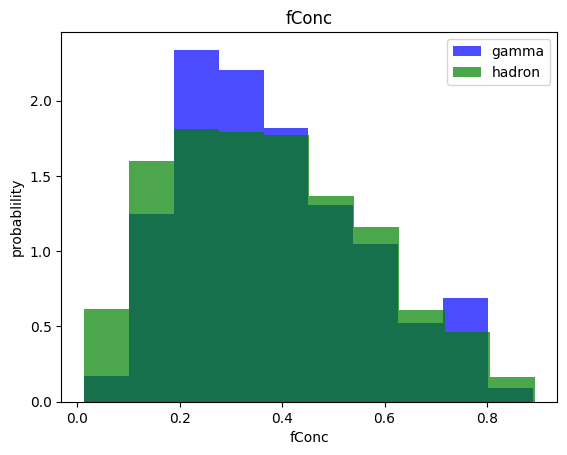

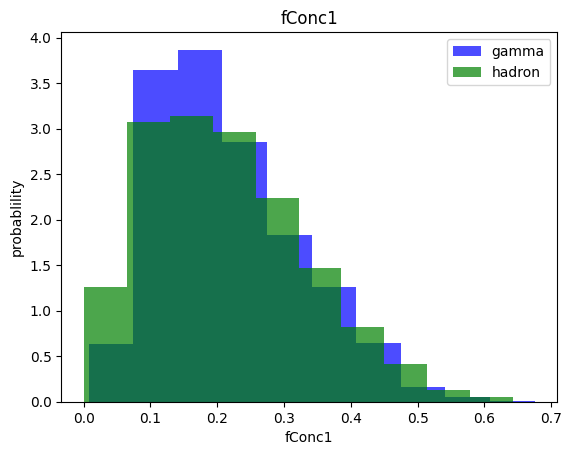

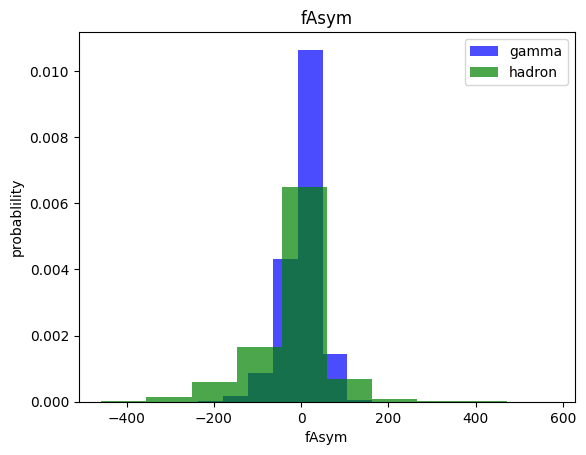

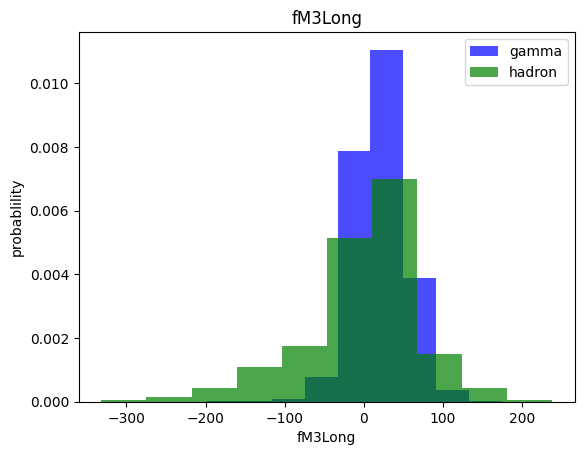

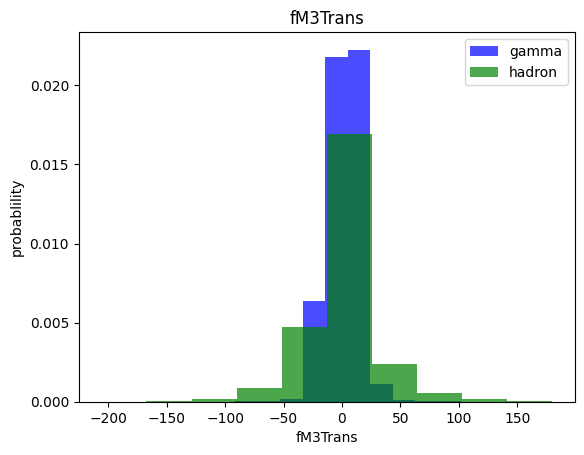

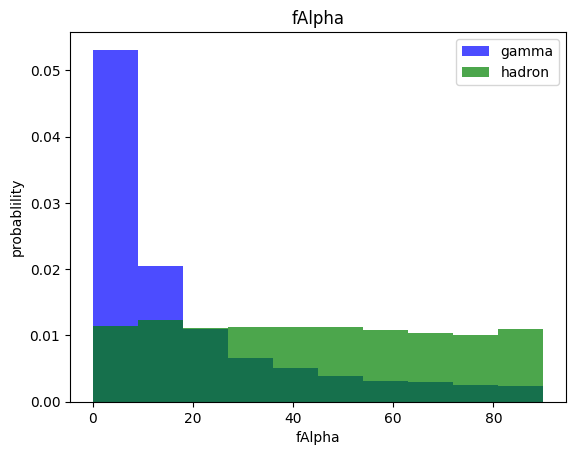

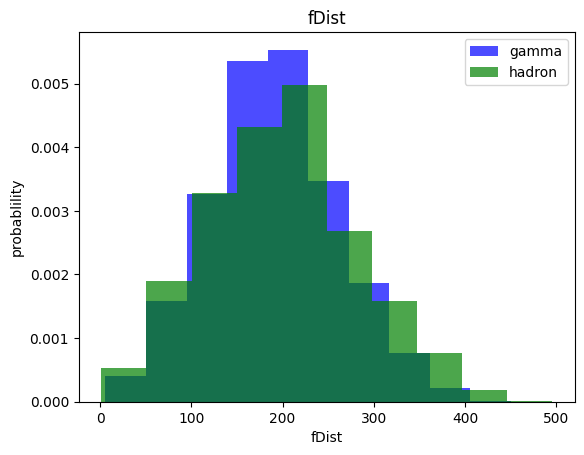

In [130]:
# Showing a histogram of all hadrons and gammas in every class in the dataset
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
    plt.hist(df[df["class"] == 0][label], color = "green", label = "hadron", alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("probablility")
    plt.xlabel(label)
    plt.legend()
    plt.show()


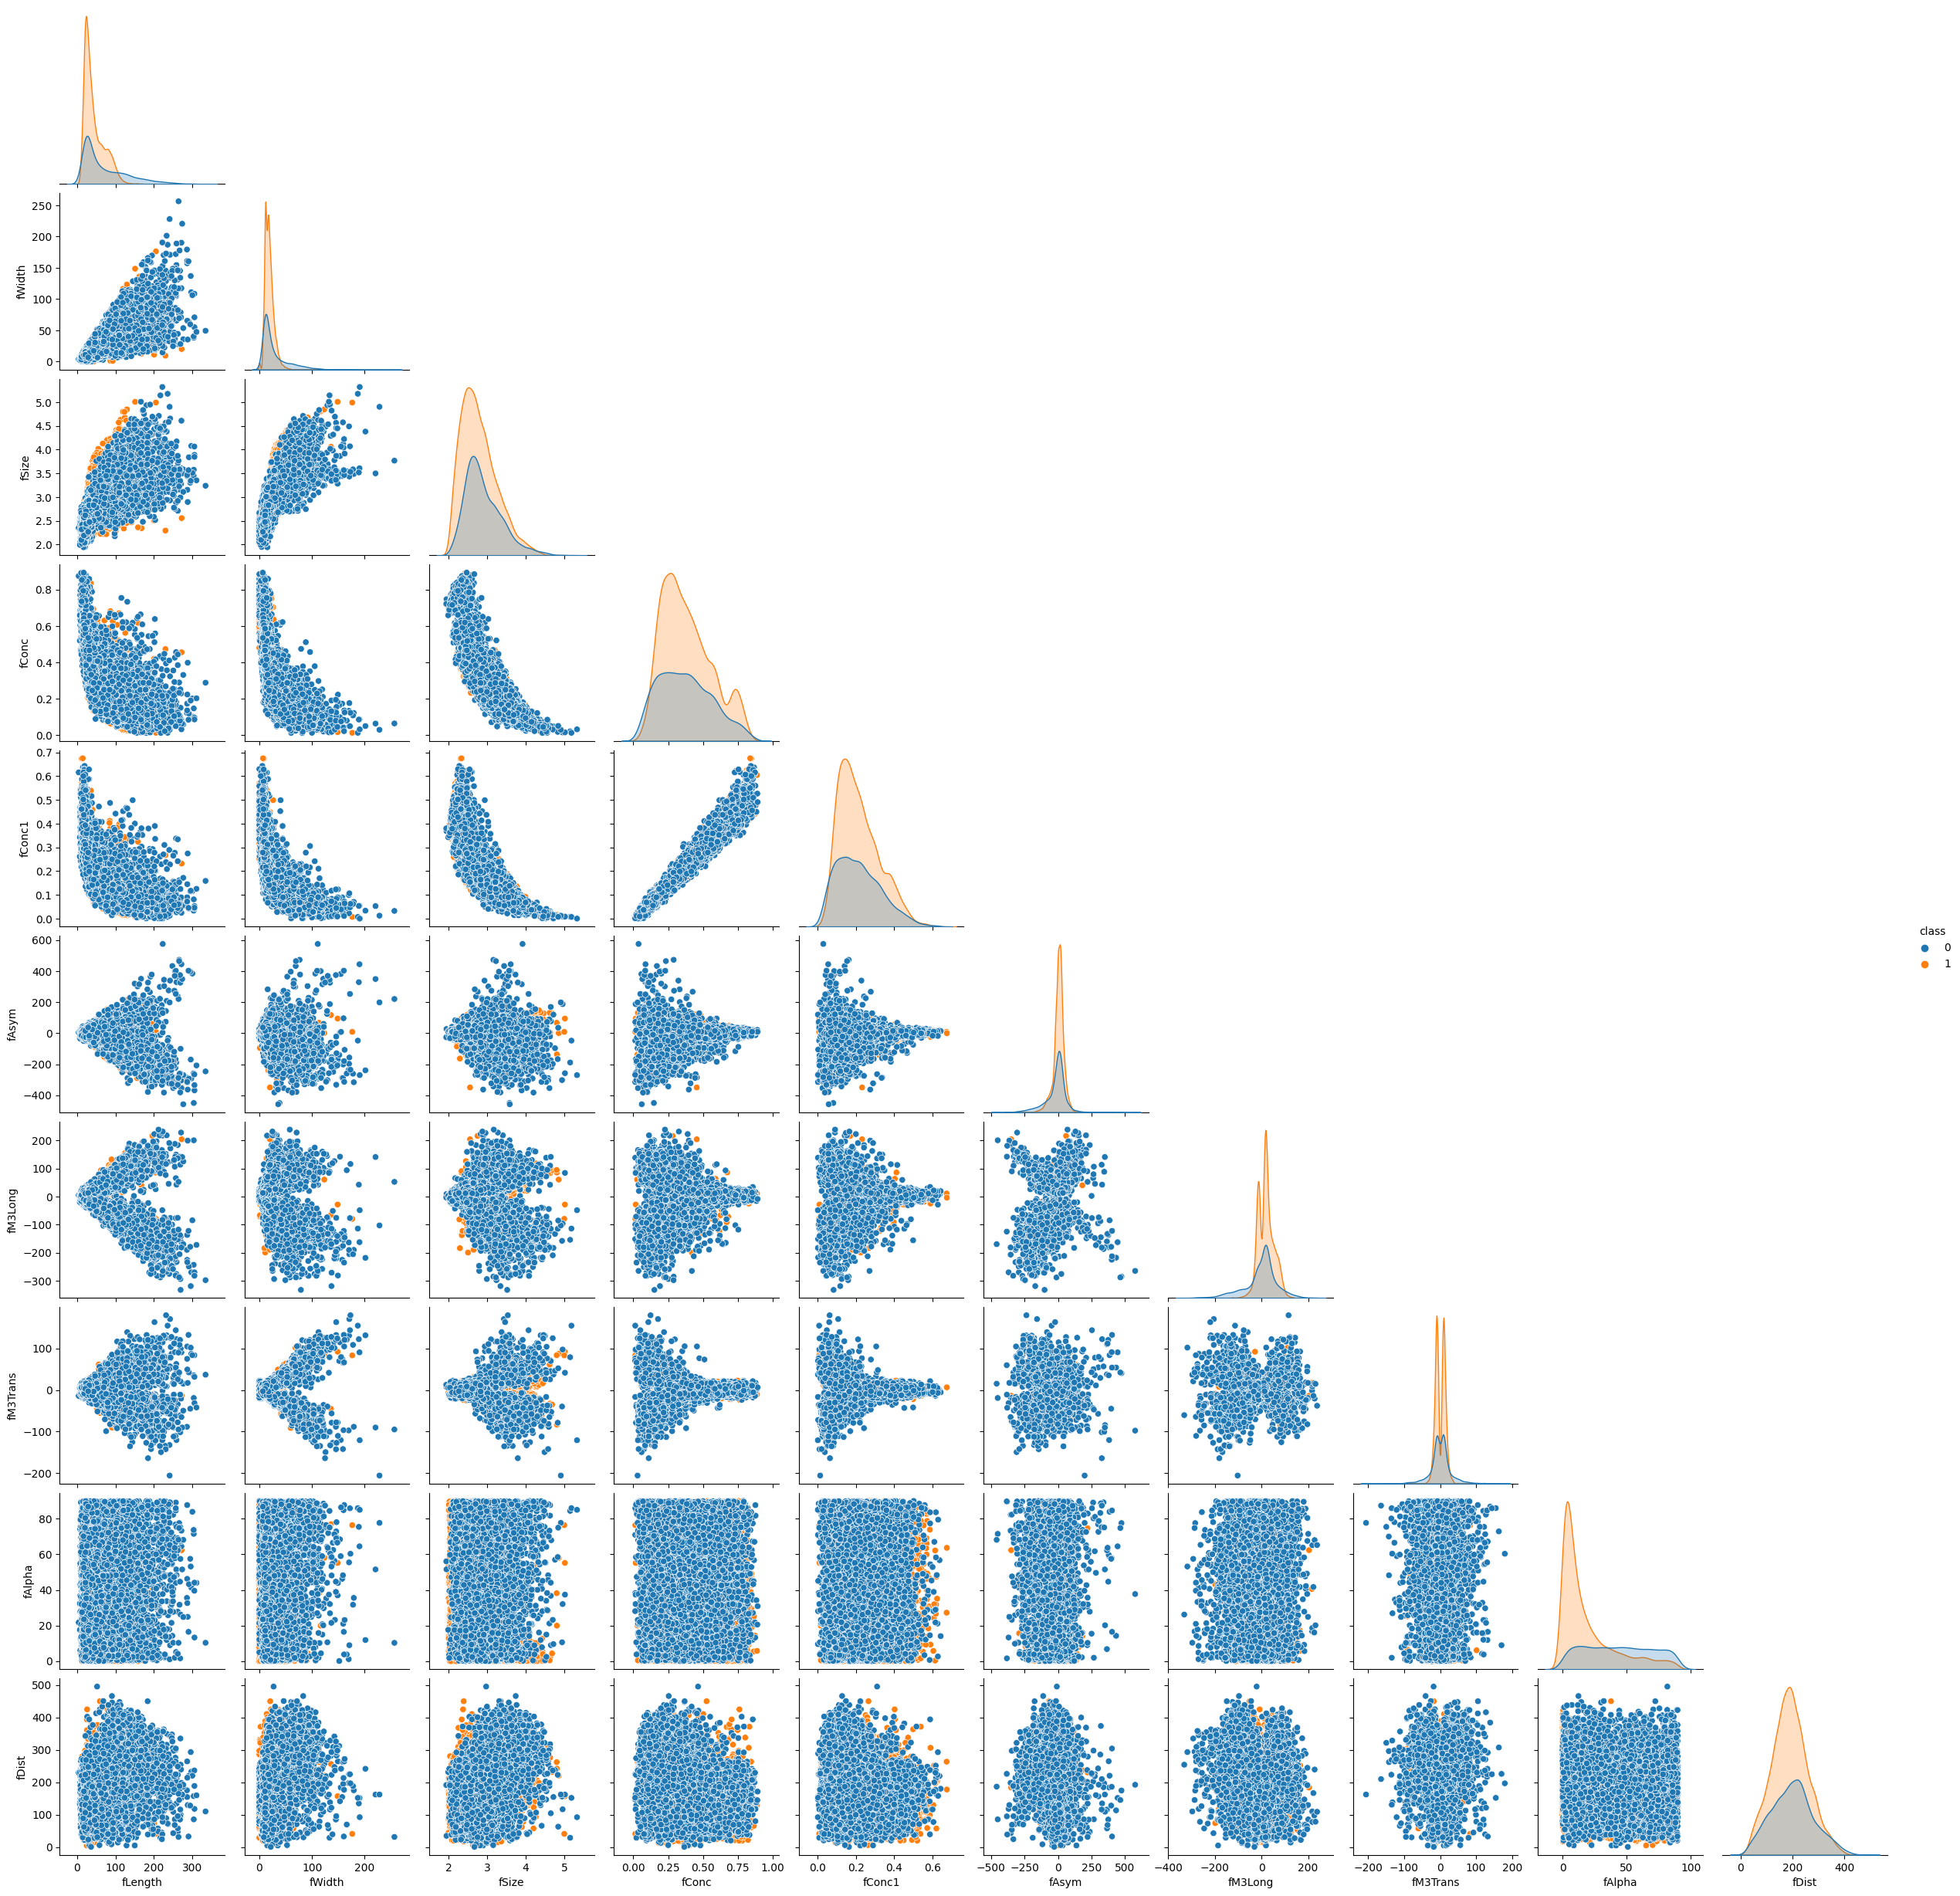

In [131]:
# pairplot of all features

data = df
sns.pairplot(data = data, hue = "class", corner = True);

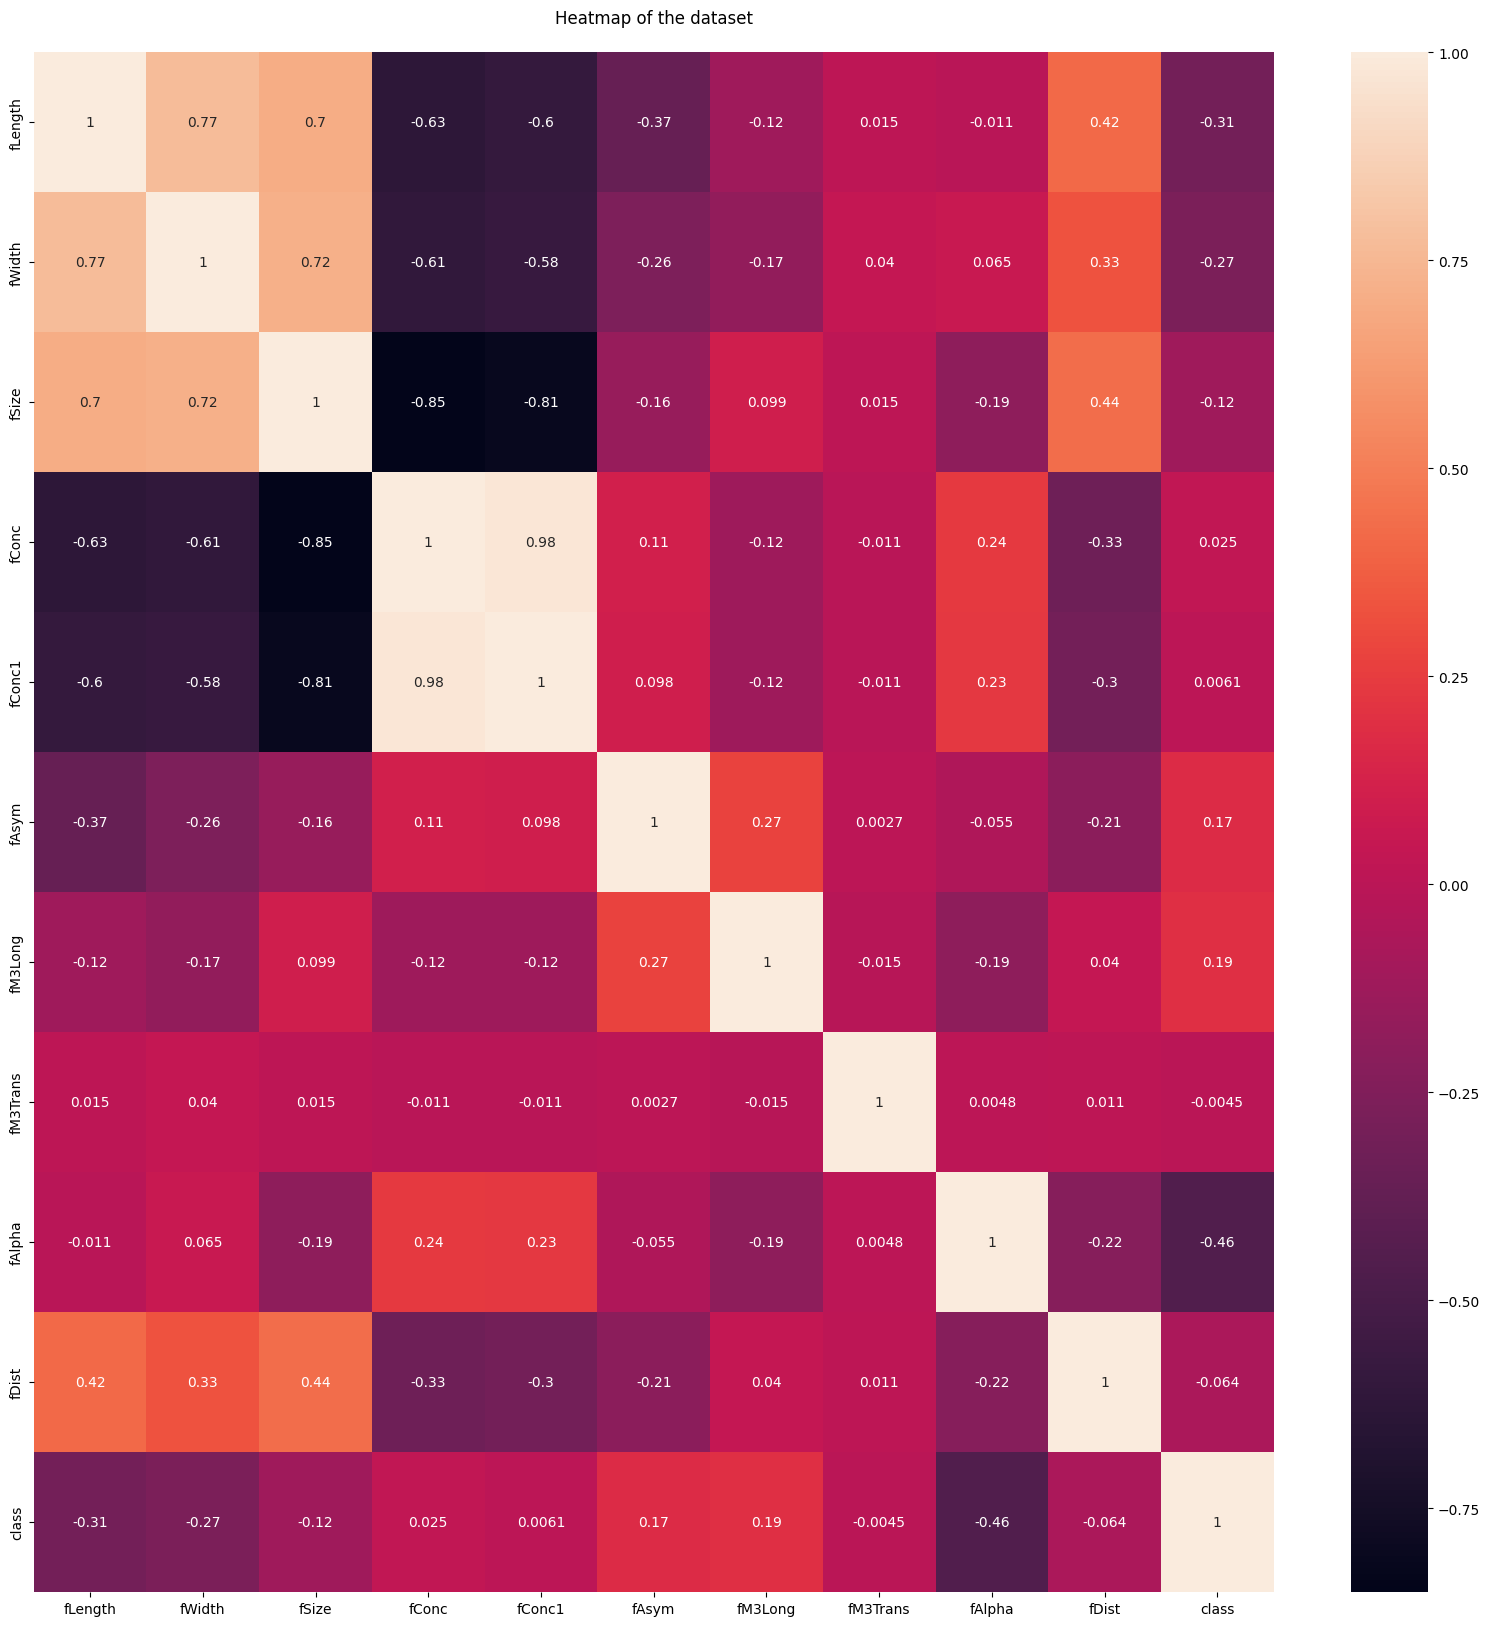

In [132]:
# correlation heatmap

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)
plt.title("Heatmap of the dataset\n")
plt.show()

# Train, test dataset


In [133]:
# Splitting our data set into 70% train 30% testing
train, test = np.split(df.sample(frac = 1), [int(0.7 * len(df))])

# Sampling our data

In [134]:
def scale_dataset(dataframe, oversample = False):
    x = dataframe[dataframe.columns[:-1]].values   # feature matrix
    y = dataframe[dataframe.columns[-1]].values    # target vector

    scaler = StandardScaler()
    X = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
        
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [135]:
# Checking to see if we have equal samples of gamma and hadrons in our dataset
print(len(train[train["class"] == 1]))  # Gamma
print(len(train[train["class"] == 0]))  # Hadron

8621
4612


In [136]:
print(len(test[test["class"] == 1]))
print(len(test[test["class"] == 0]))

3711
1961


In [137]:
train, x_train, y_train = scale_dataset(train, oversample = True)
test, x_test, y_test = scale_dataset(test, oversample = False) # We're not oversampling test dataset so 
# that the model can work efficiently with data that hasn't been seen before


In [138]:
len(x_train)

17242

In [139]:
len(y_train)

17242

In [140]:
len(x_test)

5672

In [141]:
len(y_test)

5672

# K-Nearest Neighbor


In [142]:
from sklearn.neighbors import KNeighborsClassifier 

In [143]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_moedl = knn_model.fit(x_train, y_train)

In [144]:
y_pred = knn_model.predict(x_test)

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1961
           1       0.86      0.85      0.85      3711

    accuracy                           0.81      5672
   macro avg       0.79      0.79      0.79      5672
weighted avg       0.81      0.81      0.81      5672



In [146]:
# Calculate accuracy score
knn_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy of knn model: {knn_model_accuracy_score * 100: .2f}%\n")

# Calculate F1 score
knn_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score of knn model: {knn_model_f1_score * 100: .2f}%\n")

# Calculate recall score
knn_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall of knn model: {knn_model_recall_score * 100: .2f}%\n")

# Calculate precision score
knn_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision of knn model: {knn_model_precision_score* 100: .2f}%")

Accuracy of knn model:  80.99%

F1 Score of knn model:  85.47%

Recall of knn model:  85.42%

Precision of knn model:  85.51%


# Support Vector Machine


In [147]:
from sklearn.svm import SVC

In [148]:
svm_model = SVC() 
svm_model = svm_model.fit(x_train, y_train)

In [149]:
y_pred = svm_model.predict(x_test)

In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1961
           1       0.89      0.91      0.90      3711

    accuracy                           0.87      5672
   macro avg       0.86      0.85      0.85      5672
weighted avg       0.87      0.87      0.87      5672



In [151]:
# Calculate accuracy score
svm_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy of svm model: {svm_model_accuracy_score * 100: .2f}%\n")

# Calculate F1 score
svm_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score of svm model: {svm_model_f1_score * 100: .2f}%\n" )

# Calculate recall score
svm_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall of svm model: {svm_model_recall_score * 100: .2f}%\n")

# Calculate precision score
svm_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision of svm model: {svm_model_precision_score * 100: .2f}%")

Accuracy of svm model:  86.85%

F1 Score of svm model:  90.05%

Recall of svm model:  91.00%

Precision of svm model:  89.13%


# Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
lg_model = LogisticRegression( penalty = 'l2')
lg_model = lg_model.fit(x_train, y_train)

In [154]:
y_pred = lg_model.predict(x_test)

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1961
           1       0.84      0.82      0.83      3711

    accuracy                           0.78      5672
   macro avg       0.76      0.77      0.76      5672
weighted avg       0.79      0.78      0.78      5672



In [156]:
# Calculate accuracy score
lg_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy of logistic regression model: {lg_model_accuracy_score * 100: .2f}%\n")

# Calculate F1 score
lg_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score of logistic regression model: {lg_model_f1_score * 100: .2f}%\n")

# Calculate recall score
lg_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall of logistic regression model: {lg_model_recall_score * 100: .2f}%\n")

# Calculate precision score
lg_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision of logistic regression model: {lg_model_precision_score * 100: .2f}%")

Accuracy of logistic regression model:  78.17%

F1 Score of logistic regression model:  83.05%

Recall of logistic regression model:  81.73%

Precision of logistic regression model:  84.41%


# Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model = rf_model.fit(x_train, y_train)

In [159]:
y_pred = rf_model.predict(x_test)

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1961
           1       0.89      0.92      0.91      3711

    accuracy                           0.88      5672
   macro avg       0.87      0.86      0.86      5672
weighted avg       0.88      0.88      0.88      5672



In [161]:
# Calculate accuracy score
rf_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracyof Random Forest model: {rf_model_accuracy_score * 100: .2f}%\n")

# Calculate F1 score
rf_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score of Random Forest model: {rf_model_f1_score * 100: .2f}%\n")

# Calculate recall score
rf_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall of Random Forest model: {rf_model_recall_score * 100: .2f}%\n")

# Calculate precision score
rf_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision of Random Forest model: {rf_model_precision_score * 100: .2f}%")

Accuracyof Random Forest model:  87.75%

F1 Score of Random Forest model:  90.80%

Recall of Random Forest model:  92.45%

Precision of Random Forest model:  89.21%


# Decision Tree


In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train, y_train)

In [164]:
y_pred = dt_model.predict(x_test)

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1961
           1       0.86      0.84      0.85      3711

    accuracy                           0.81      5672
   macro avg       0.79      0.79      0.79      5672
weighted avg       0.81      0.81      0.81      5672



In [166]:
dt_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision tree model: {rf_model_precision_score * 100: .2f}%\n")

# Calculate F1 score
dt_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score of Decision tree model: {dt_model_f1_score * 100: .2f}%\n")

# Calculate recall score
dt_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall of Decision tree model: {dt_model_recall_score * 100: .2f}%\n")

# Calculate precision score
dt_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision of Decision tree model: {dt_model_precision_score * 100: .2f}%")

Accuracy of Decision tree model:  89.21%

F1 Score of Decision tree model:  85.06%

Recall of Decision tree model:  84.32%

Precision of Decision tree model:  85.82%


# Naive Bayes

In [179]:
from sklearn.naive_bayes import GaussianNB

In [180]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [181]:
y_pred = nb_model.predict(x_test)

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1961
           1       0.74      0.90      0.81      3711

    accuracy                           0.73      5672
   macro avg       0.71      0.65      0.66      5672
weighted avg       0.72      0.73      0.71      5672



In [184]:
nb_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes model: {nb_model_accuracy_score * 100: .2f}%\n")

# Calculate F1 score
nb_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score of Naive Bayes model: {nb_model_f1_score * 100: .2f}%\n")

# Calculate recall score
nb_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall of Naive Bayes model: {nb_model_recall_score * 100: .2f}%\n")

# Calculate precision score
nb_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision of Naive Bayes model: {nb_model_precision_score * 100: .2f}%")

Accuracy of Naive Bayes model:  72.94%

F1 Score of Naive Bayes model:  81.25%

Recall of Naive Bayes model:  89.63%

Precision of Naive Bayes model:  74.31%


# Multi-layer Perceptron

In [187]:
from sklearn.neural_network import MLPClassifier

In [189]:
nn_model = MLPClassifier(max_iter = 700, random_state = 42)
nn_model = nn_model.fit(x_train, y_train)

In [191]:
y_pred = nn_model.predict(x_test)

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1961
           1       0.91      0.89      0.90      3711

    accuracy                           0.87      5672
   macro avg       0.85      0.86      0.86      5672
weighted avg       0.87      0.87      0.87      5672



In [193]:
nn_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy of Multi-layer Perceptron model: {nn_model_accuracy_score * 100: .2f}%\n")

# Calculate F1 score
nn_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score of Multi-layer Perceptron model: {nn_model_f1_score * 100: .2f}%\n")

# Calculate recall score
nn_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall of Multi-layer Perceptron model: {nn_model_recall_score * 100: .2f}%\n")

# Calculate precision score
nn_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision of Multi-layer Perceptron model: {nn_model_precision_score * 100: .2f}%")

Accuracy of Multi-layer Perceptron model:  86.85%

F1 Score of Multi-layer Perceptron model:  89.86%

Recall of Multi-layer Perceptron model:  89.09%

Precision of Multi-layer Perceptron model:  90.65%


# Gradient Boosting

In [194]:
from sklearn.ensemble import GradientBoostingClassifier

In [195]:
gb_model = GradientBoostingClassifier()
gb_model = gb_model.fit(x_train, y_train)

In [196]:
y_pred = gb_model.predict(x_test)

In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1961
           1       0.90      0.89      0.90      3711

    accuracy                           0.86      5672
   macro avg       0.85      0.85      0.85      5672
weighted avg       0.86      0.86      0.86      5672



In [198]:
gb_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gradient Boosting model: {gb_model_accuracy_score * 100: .2f}%\n")

# Calculate F1 score
gb_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score of Gradient Boosting model: {gb_model_f1_score * 100: .2f}%\n")

# Calculate recall score
gb_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall of Gradient Boosting model: {gb_model_recall_score * 100: .2f}%\n")

# Calculate precision score
gb_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision of Gradient Boosting model: {gb_model_precision_score * 100: .2f}%")

Accuracy of Gradient Boosting model:  86.30%

F1 Score of Gradient Boosting model:  89.52%

Recall of Gradient Boosting model:  89.38%

Precision of Gradient Boosting model:  89.65%
